In [9]:
locals().clear() #clear workspace

In [17]:
import sys
sys.path.append('/Users/peterpaw/dplpy-wilcea/dplpy')

from agedepspline import ads_R2Py

Let's load our new ADS function ads_R2Py. 

In [18]:
import pandas as pd
import dplpy as dpl
import matplotlib.pyplot as plt


Below we can now use our function with the ca533 rwl file. First we read in the data file (not yet built in like it is with dplR).

In [20]:

data = dpl.readers("../tests/data/rwl/ca533.rwl")
column_data = data.iloc[:, 4]
column_data = column_data.dropna()
y = column_data.values


Attempting to read input file: ca533.rwl as .rwl format


SUCCESS!
File read as: .rwl file

Series names:
['CAM011', 'CAM021', 'CAM031', 'CAM032', 'CAM041', 'CAM042', 'CAM051', 'CAM061', 'CAM062', 'CAM071', 'CAM072', 'CAM081', 'CAM082', 'CAM091', 'CAM092', 'CAM101', 'CAM102', 'CAM111', 'CAM112', 'CAM121', 'CAM122', 'CAM131', 'CAM132', 'CAM141', 'CAM151', 'CAM152', 'CAM161', 'CAM162', 'CAM171', 'CAM172', 'CAM181', 'CAM191', 'CAM201', 'CAM211'] 



In [23]:
Py_ads_Pos = ads_R2Py(y,nyrs0=22,pos_slope=True)
Py_ads_noPos = ads_R2Py(y,nyrs0=22,pos_slope=False)

# Read the CSV file into a DataFrame
R_ads_Pos = pd.read_csv('../tests/data/csv/ca533_adsR_Pos.csv')
R_ads_noPos = pd.read_csv('../tests/data/csv/ca533_adsR_noPos.csv')

Plotting code is last:

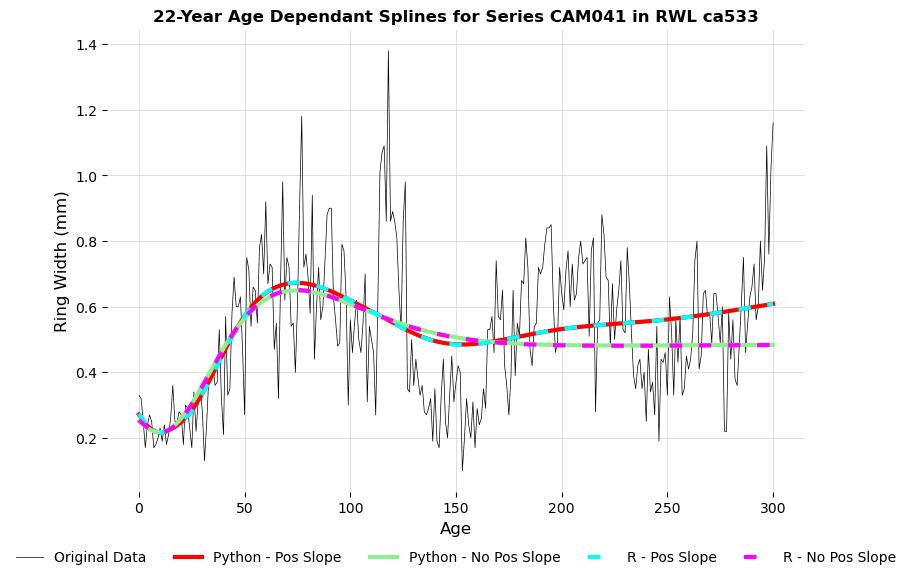

In [24]:
myLW=3
fig, ax = plt.subplots(figsize=(9, 6))  # Adjust the figsize as needed

# Plotting the original data
plt.plot(y, label='Original Data',color='black',linewidth=0.5)

# Plotting the splines
plt.plot(Py_ads_Pos, label='Python - Pos Slope', color='red',linewidth=myLW)
plt.plot(Py_ads_noPos, label='Python - No Pos Slope', color='lightgreen',linewidth=myLW)
plt.plot(R_ads_Pos, label='R - Pos Slope', color='cyan',linestyle="dashed",linewidth=myLW,dashes=(3, 4)) #length of 3, space of 4
plt.plot(R_ads_noPos, label='R - No Pos Slope', color='magenta',linestyle="dashed",linewidth=myLW,dashes=(3, 4)) #length of 3, space of 4

# Labels and title
plt.xlabel('Age',size=12)
plt.ylabel('Ring Width (mm)',size=12)
plt.title('22-Year Age Dependant Splines for Series CAM041 in RWL ca533',fontweight='bold')


# Adding gridlines to match the R plot
plt.grid(True, color='lightgrey', linestyle='-', linewidth=0.5)

# Removing the plot outline (spines) to match the R plot
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), ncol=5,frameon=False)

plt.show()